In [2]:
import pandas as pd
import seaborn as sns
import zipfile
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
import joblib
from google.colab import files



Loading the Dataset


In [2]:
df = pd.read_csv('/content/parkinsons_updrs.csv')


df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Check for missing Values

In [4]:
df.isnull().sum()

,0
subject#,0
age,0
sex,0
test_time,0
motor_UPDRS,0
total_UPDRS,0
Jitter(%),0
Jitter(Abs),0
Jitter:RAP,0
Jitter:PPQ5,0


In [5]:
print(df.dtypes)


subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object


In [6]:
df.shape

(5875, 22)

In [7]:
df['total_UPDRS'].value_counts()

,count
total_UPDRS,
32.000,109
19.000,70
7.000,54
27.114,12
40.610,12
...,...
42.984,1
34.657,1
35.863,1


In [8]:
df.corr()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


In [9]:
df.groupby('motor_UPDRS').mean()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
motor_UPDRS,,,,,,,,,,,,,,,,,,,,,
5.0377,18.0,65.0,0.0,165.360,7.000000,0.003690,0.000025,0.001837,0.001903,0.005507,...,0.174000,0.009393,0.010593,0.014860,0.028183,0.013994,26.228667,0.421353,0.644250,0.150303
5.0378,18.0,65.0,0.0,165.360,7.000000,0.004230,0.000031,0.001893,0.002273,0.005687,...,0.190000,0.010193,0.012153,0.017760,0.030580,0.015521,25.294000,0.496477,0.661833,0.163577
5.1375,18.0,65.0,0.0,158.370,7.000000,0.004920,0.000031,0.002593,0.002500,0.007780,...,0.220000,0.012490,0.013577,0.016793,0.037477,0.013171,22.343667,0.425513,0.665803,0.158997
5.1376,18.0,65.0,0.0,158.370,7.000000,0.005073,0.000035,0.002317,0.002623,0.006950,...,0.253000,0.014663,0.018047,0.022923,0.043993,0.017473,22.287333,0.444400,0.660987,0.206183
5.4370,18.0,65.0,0.0,137.410,7.000000,0.002550,0.000018,0.000910,0.001320,0.002740,...,0.167000,0.009630,0.011200,0.013970,0.028880,0.008797,28.229000,0.445990,0.610900,0.103880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37.6580,41.0,68.0,1.0,112.560,45.727000,0.007600,0.000041,0.003760,0.004010,0.011272,...,0.375250,0.018230,0.021360,0.035775,0.054692,0.046333,19.138000,0.622670,0.645655,0.327107
37.6590,41.0,68.0,1.0,112.560,45.727000,0.008690,0.000051,0.004350,0.004435,0.013045,...,0.284500,0.015140,0.015060,0.023330,0.045420,0.055703,19.052000,0.619320,0.694760,0.355175
37.6640,37.0,56.0,1.0,175.820,48.530000,0.004912,0.000024,0.002728,0.002673,0.008192,...,0.226667,0.012335,0.013523,0.017240,0.037008,0.026780,22.136333,0.478533,0.574798,0.162018


In [10]:
df.groupby('total_UPDRS').mean()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
total_UPDRS,,,,,,,,,,,,,,,,,,,,,
7.0000,18.0,65.0,0.0,126.835296,5.58807,0.004301,0.000033,0.002049,0.002234,0.006149,...,0.225241,0.012881,0.014766,0.019737,0.038641,0.014159,24.527833,0.436708,0.659938,0.170610
7.0881,22.0,57.0,1.0,89.854000,7.06300,0.002850,0.000013,0.001375,0.001280,0.004130,...,0.162000,0.008850,0.009710,0.011985,0.026550,0.019356,29.844500,0.291130,0.625215,0.125881
7.0882,22.0,57.0,1.0,89.853000,7.06300,0.002630,0.000012,0.001270,0.001450,0.003810,...,0.122000,0.006400,0.008620,0.013020,0.019200,0.006787,28.585000,0.390430,0.679840,0.131910
7.0883,22.0,57.0,1.0,89.852000,7.06310,0.001883,0.000008,0.000937,0.001037,0.002813,...,0.121333,0.006490,0.007780,0.011243,0.019473,0.002434,29.443333,0.402490,0.658937,0.085122
7.0982,18.0,65.0,0.0,88.373333,6.00000,0.004130,0.000028,0.002035,0.002040,0.006107,...,0.348833,0.022735,0.020422,0.027343,0.068205,0.011618,23.606667,0.411852,0.661073,0.160865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54.7270,35.0,71.0,0.0,104.500000,36.59100,0.006532,0.000043,0.002992,0.003708,0.008980,...,0.409500,0.021887,0.027460,0.040833,0.065657,0.022755,18.623833,0.521398,0.725813,0.293912
54.7890,35.0,71.0,0.0,69.413167,36.78900,0.007883,0.000054,0.003395,0.004015,0.010187,...,0.468333,0.024630,0.031033,0.040483,0.073888,0.024105,18.775833,0.527043,0.753537,0.295987
54.8680,35.0,71.0,0.0,76.393667,36.86800,0.005048,0.000033,0.002050,0.002613,0.006152,...,0.294667,0.015917,0.019027,0.027457,0.047753,0.012491,20.814000,0.466102,0.728765,0.254762


Corelation Heatmap

In [11]:
corelation = df.corr()


<Axes: >

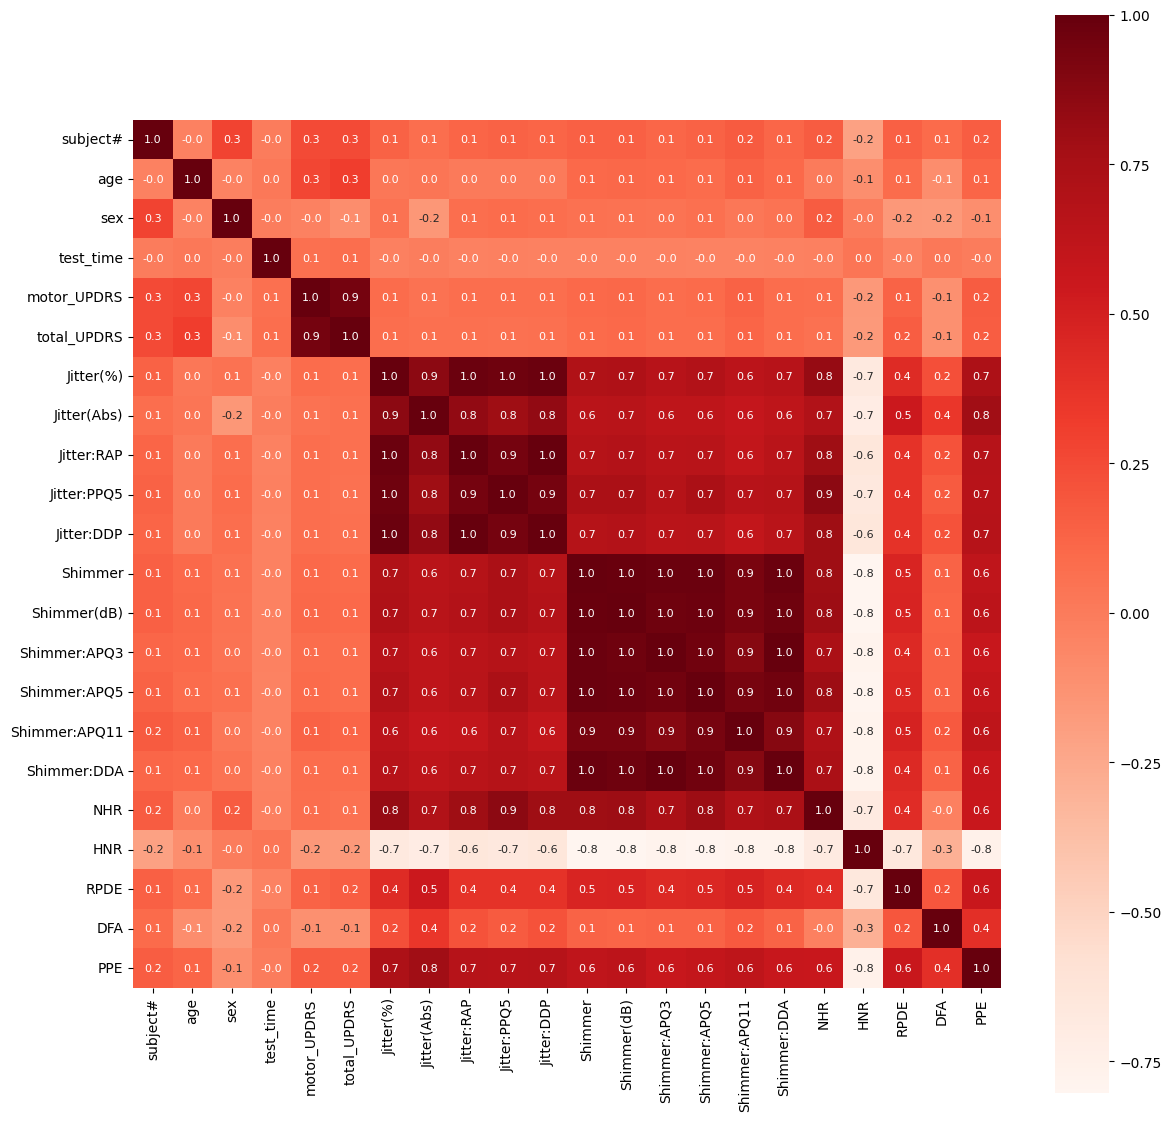

In [12]:

plt.figure(figsize=(14,14))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [13]:
corr_matrix = df.corr().abs()

In [14]:
print(corr_matrix)

               subject#       age       sex  test_time  motor_UPDRS  \
subject#       1.000000  0.030864  0.286851   0.000882     0.252919   
age            0.030864  1.000000  0.041602   0.019884     0.273665   
sex            0.286851  0.041602  1.000000   0.009805     0.031205   
test_time      0.000882  0.019884  0.009805   1.000000     0.067918   
motor_UPDRS    0.252919  0.273665  0.031205   0.067918     1.000000   
total_UPDRS    0.253643  0.310290  0.096559   0.075263     0.947231   
Jitter(%)      0.135448  0.023071  0.051422   0.022837     0.084816   
Jitter(Abs)    0.075156  0.035691  0.154645   0.011365     0.050903   
Jitter:RAP     0.120339  0.010255  0.076718   0.028888     0.072684   
Jitter:PPQ5    0.136474  0.013199  0.087995   0.023290     0.076291   
Jitter:DDP     0.120350  0.010258  0.076703   0.028876     0.072698   
Shimmer        0.146202  0.101554  0.058736   0.033870     0.102349   
Shimmer(dB)    0.142864  0.111130  0.056481   0.030962     0.110076   
Shimme

In [15]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [16]:
# Threshold for redundancy
threshold = 0.9
redundant_features = [column for column in upper.columns if any(upper[column] > threshold)]


In [17]:
print("Highly correlated features to consider removing:")
for col in redundant_features:
    corr_with = upper[col][upper[col] > threshold]
    for other_col, val in corr_with.items():
        print(f"{col} ⟷ {other_col}: {val:.3f}")


Highly correlated features to consider removing:
total_UPDRS ⟷ motor_UPDRS: 0.947
Jitter:RAP ⟷ Jitter(%): 0.984
Jitter:PPQ5 ⟷ Jitter(%): 0.968
Jitter:PPQ5 ⟷ Jitter:RAP: 0.947
Jitter:DDP ⟷ Jitter(%): 0.984
Jitter:DDP ⟷ Jitter:RAP: 1.000
Jitter:DDP ⟷ Jitter:PPQ5: 0.947
Shimmer(dB) ⟷ Shimmer: 0.992
Shimmer:APQ3 ⟷ Shimmer: 0.980
Shimmer:APQ3 ⟷ Shimmer(dB): 0.968
Shimmer:APQ5 ⟷ Shimmer: 0.985
Shimmer:APQ5 ⟷ Shimmer(dB): 0.976
Shimmer:APQ5 ⟷ Shimmer:APQ3: 0.963
Shimmer:APQ11 ⟷ Shimmer: 0.935
Shimmer:APQ11 ⟷ Shimmer(dB): 0.936
Shimmer:APQ11 ⟷ Shimmer:APQ5: 0.939
Shimmer:DDA ⟷ Shimmer: 0.980
Shimmer:DDA ⟷ Shimmer(dB): 0.968
Shimmer:DDA ⟷ Shimmer:APQ3: 1.000
Shimmer:DDA ⟷ Shimmer:APQ5: 0.963


Finding the treshold

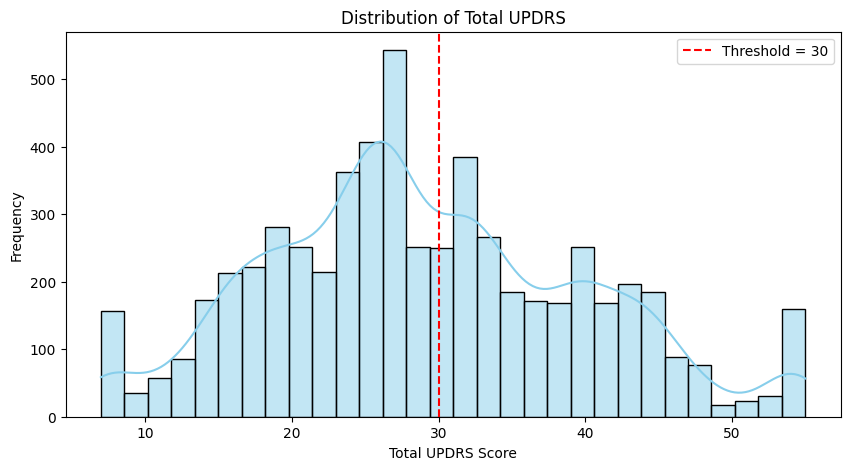

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_UPDRS'], kde=True, bins=30, color='skyblue')
plt.axvline(x=30, color='red', linestyle='--', label='Threshold = 30')
plt.title("Distribution of Total UPDRS")
plt.xlabel("Total UPDRS Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

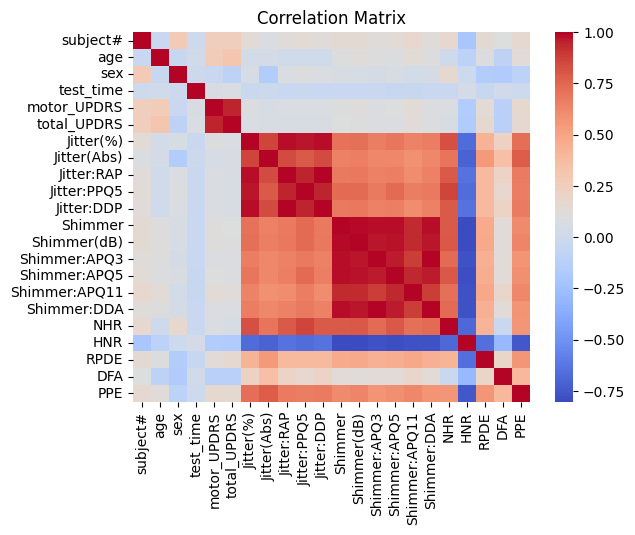

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


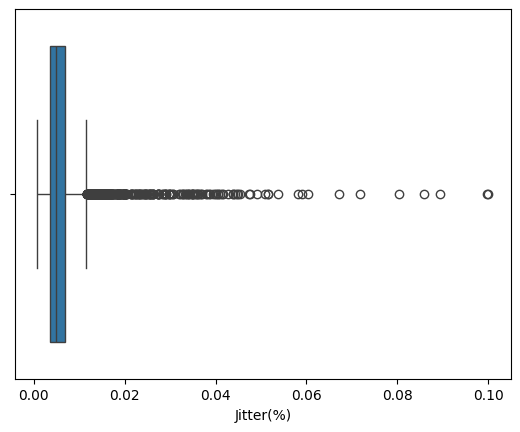

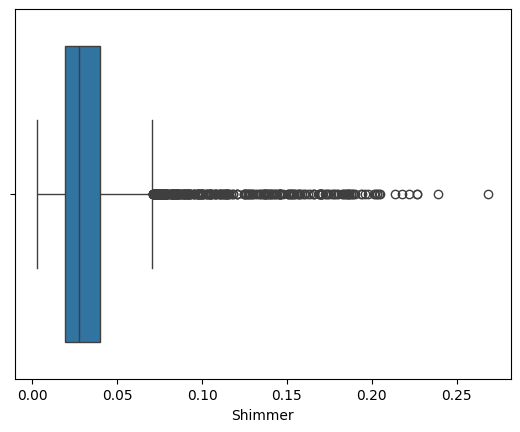

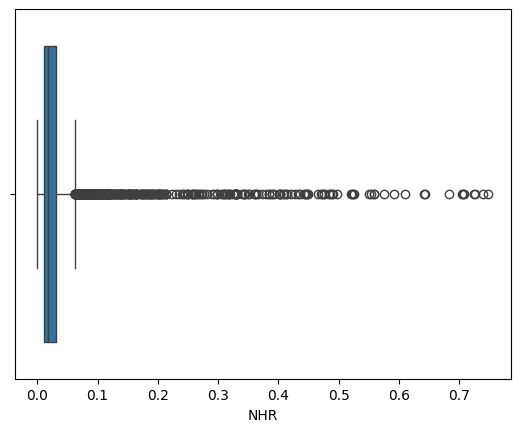

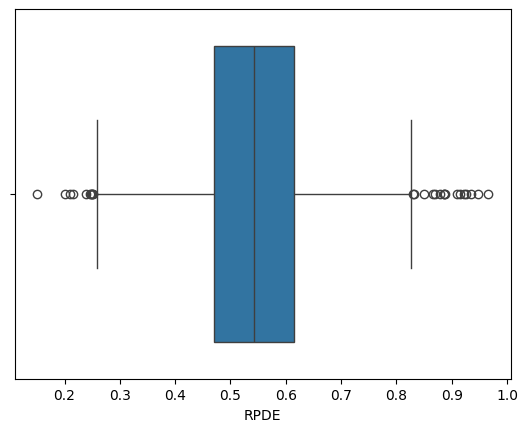

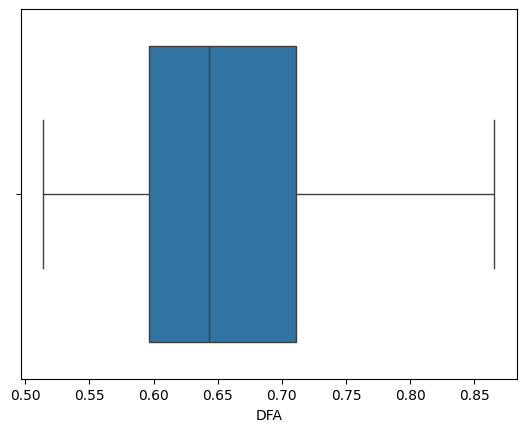

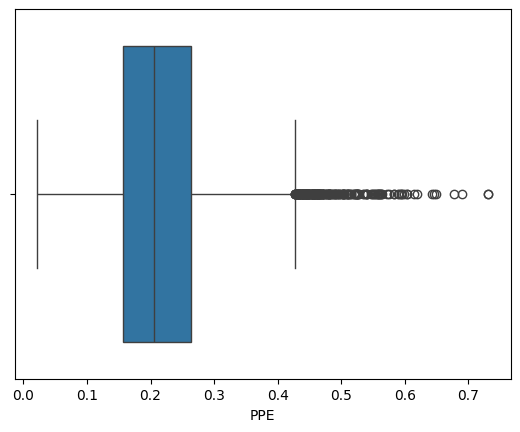

In [20]:
for column in ['Jitter(%)', 'Shimmer', 'NHR', 'RPDE', 'DFA', 'PPE']:
  sns.boxplot(x=df[column])
  plt.show()

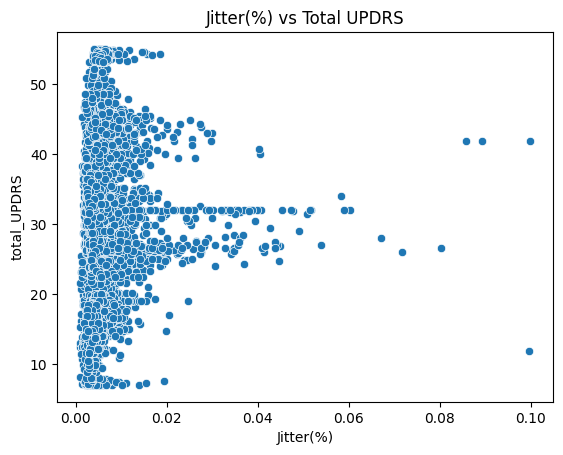

In [21]:
sns.scatterplot(x='Jitter(%)', y='total_UPDRS', data=df)
plt.title("Jitter(%) vs Total UPDRS")
plt.show()

<Axes: xlabel='Jitter(%)', ylabel='total_UPDRS'>

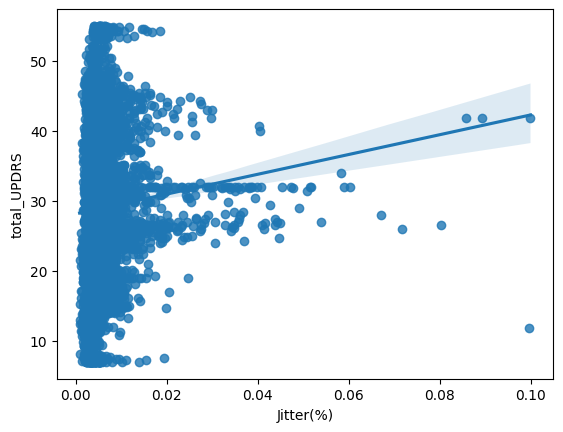

In [22]:
sns.regplot(x='Jitter(%)', y='total_UPDRS', data=df)


Checking the factors affecting total UPDRS

In [23]:
correlations = df.corr()['total_UPDRS'].drop('total_UPDRS').sort_values(ascending=False)
print(correlations)


motor_UPDRS      0.947231
age              0.310290
subject#         0.253643
RPDE             0.156897
PPE              0.156195
Shimmer:APQ11    0.120838
Shimmer(dB)      0.098790
Shimmer          0.092141
Shimmer:APQ5     0.083467
Shimmer:DDA      0.079363
Shimmer:APQ3     0.079363
test_time        0.075263
Jitter(%)        0.074247
Jitter(Abs)      0.066927
Jitter:DDP       0.064027
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
NHR              0.060952
sex             -0.096559
DFA             -0.113475
HNR             -0.162117
Name: total_UPDRS, dtype: float64


Since motor_UPDRS is already in the total_UPDRS we drop it

In [24]:
df=df.drop(columns=['motor_UPDRS','subject#'])

In [25]:
df.shape

(5875, 20)

Binning into Very Mild , mild etc

In [26]:
df['updrs_group']=pd.cut(
    df['total_UPDRS'],
    bins=[-1, 20, 40, 60, 80, 120],
    labels=['Very Mild', 'Mild', 'Moderate', 'Severe', 'Very Severe']
)

Violin Plot

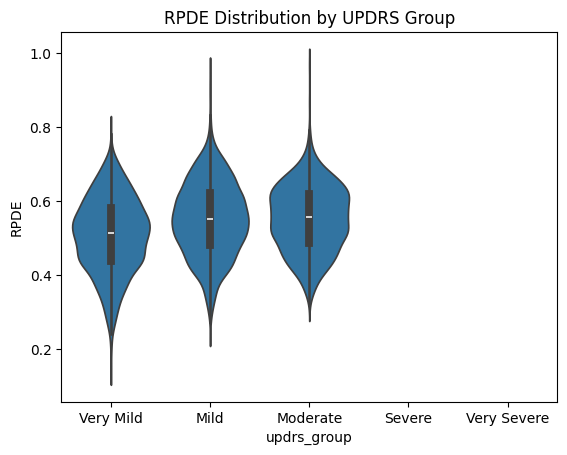

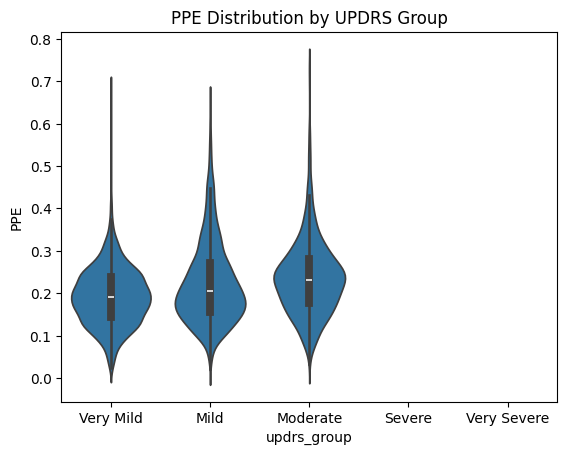

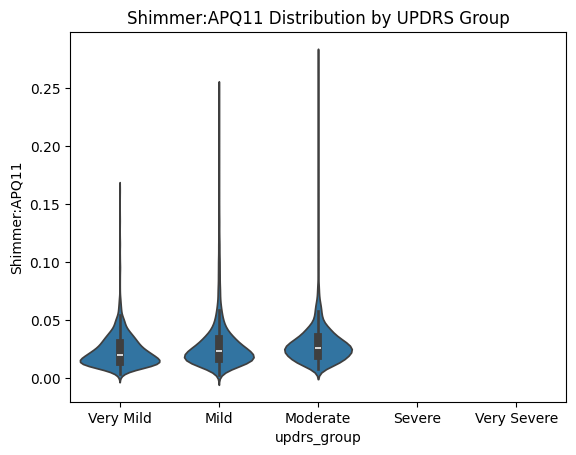

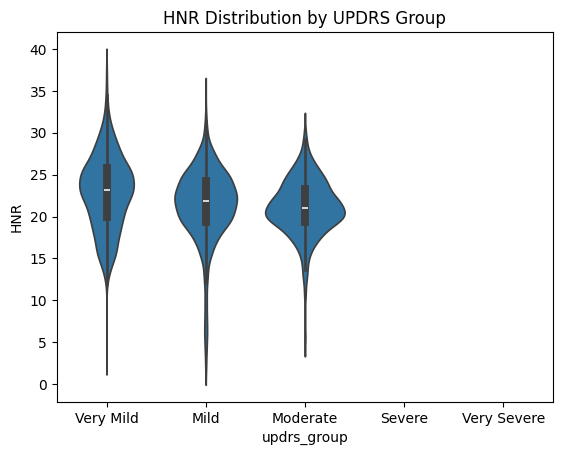

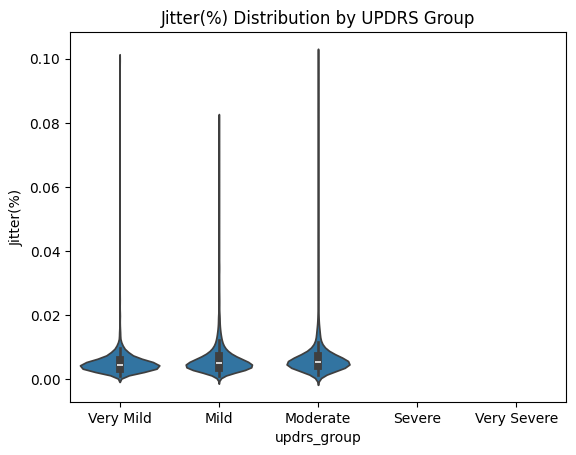

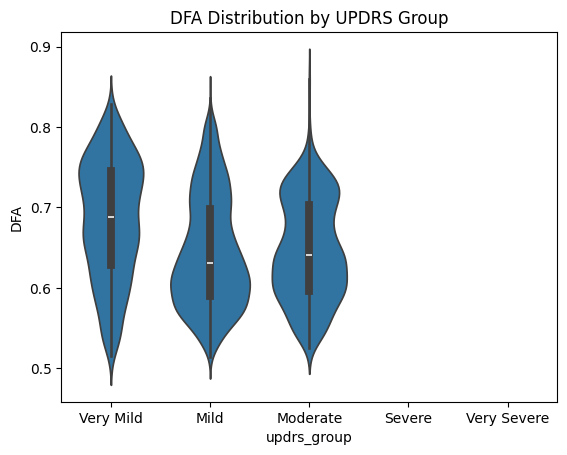

In [27]:
features = ['RPDE', 'PPE', 'Shimmer:APQ11', 'HNR', 'Jitter(%)', 'DFA']
for feature in features:
    sns.violinplot(x='updrs_group', y=feature, data=df)
    plt.title(f'{feature} Distribution by UPDRS Group')
    plt.show()

In [28]:
df.head()

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,updrs_group
0,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,Mild
1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,Mild
2,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,Mild
3,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,Mild
4,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,Mild


In [29]:
print(df['updrs_group'].value_counts())
print(df['updrs_group'].unique())


updrs_group
Mild           3593
Very Mild      1276
Moderate       1006
Severe            0
Very Severe       0
Name: count, dtype: int64
['Mild', 'Moderate', 'Very Mild']
Categories (5, object): ['Very Mild' < 'Mild' < 'Moderate' < 'Severe' < 'Very Severe']


Distribution of UPDRS severeity

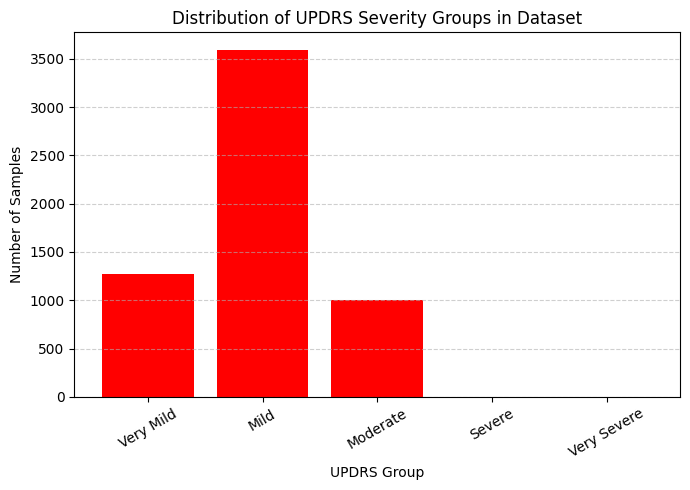

In [30]:
group_counts = df['updrs_group'].value_counts().loc[['Very Mild', 'Mild', 'Moderate', 'Severe', 'Very Severe']]

plt.figure(figsize=(7, 5))
plt.bar(group_counts.index, group_counts.values, color='red')
plt.title("Distribution of UPDRS Severity Groups in Dataset")
plt.ylabel("Number of Samples")
plt.xlabel("UPDRS Group")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Checking for Outliers and excluding the total UPDRS column

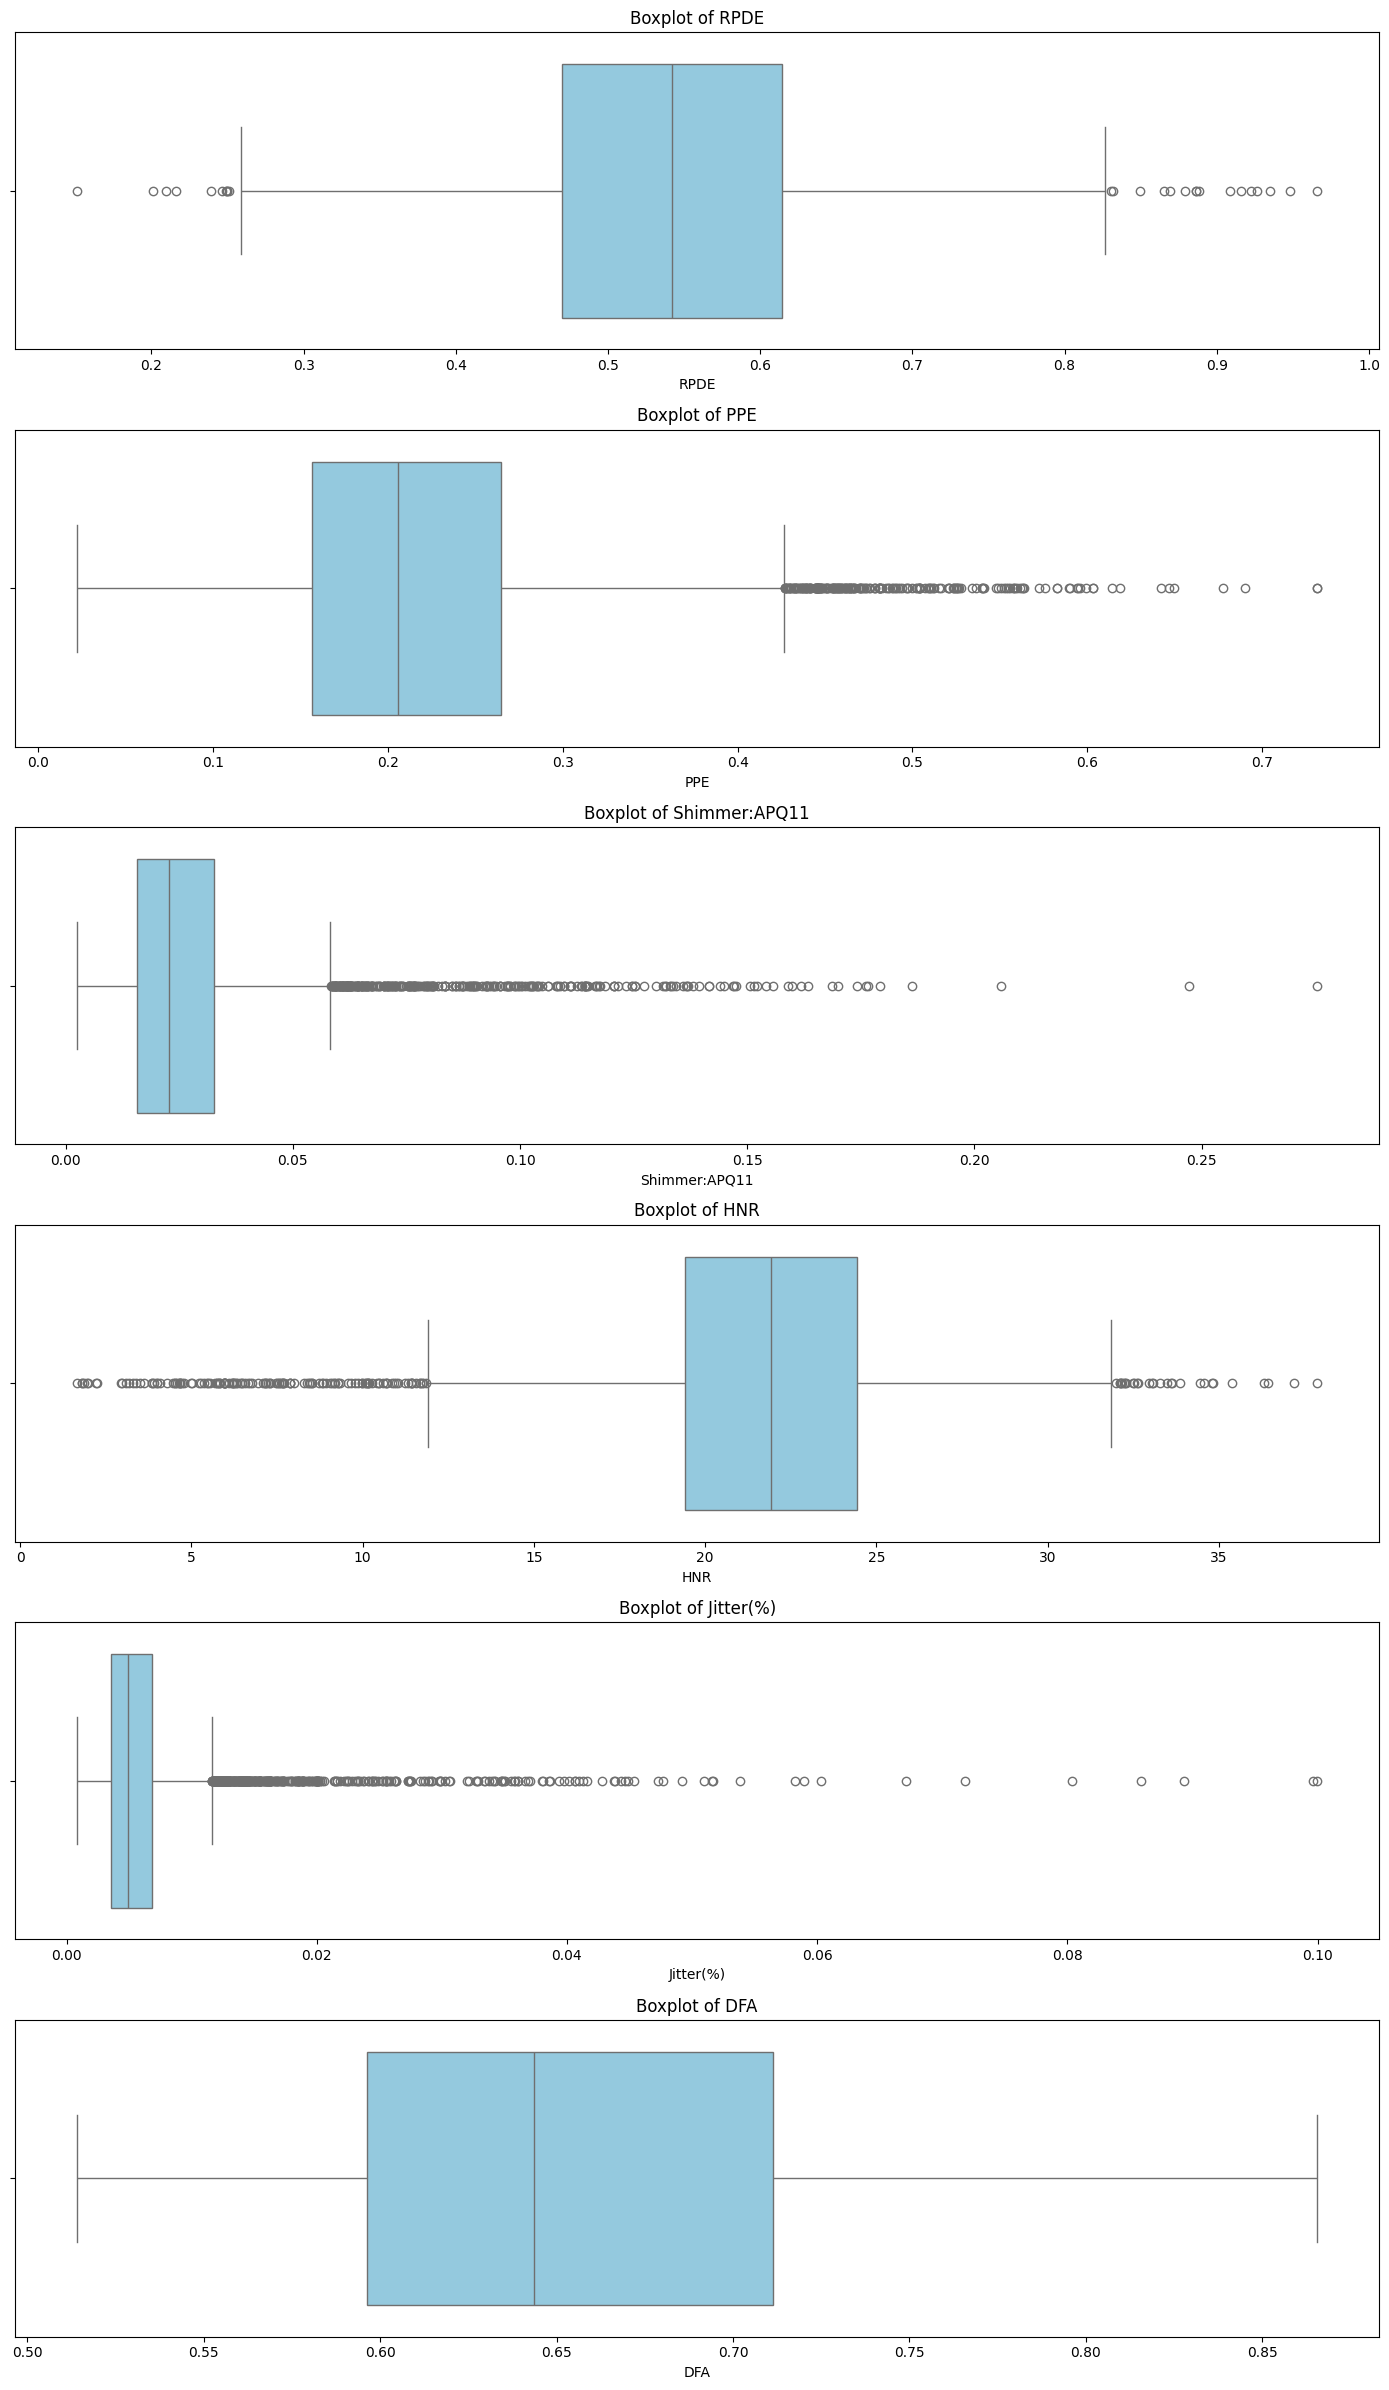

In [31]:



plt.figure(figsize=(14, len(features) * 4))
for i, col in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


Removing Ouliers using IQR

In [32]:
cap_features=[col for col in df.select_dtypes(include='number').columns if col not in ['total_UPDRS', 'index']]
for col in cap_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                np.where(df[col] > upper_bound, upper_bound, df[col]))

print("Outliers capped successfully using IQR method.")

Outliers capped successfully using IQR method.


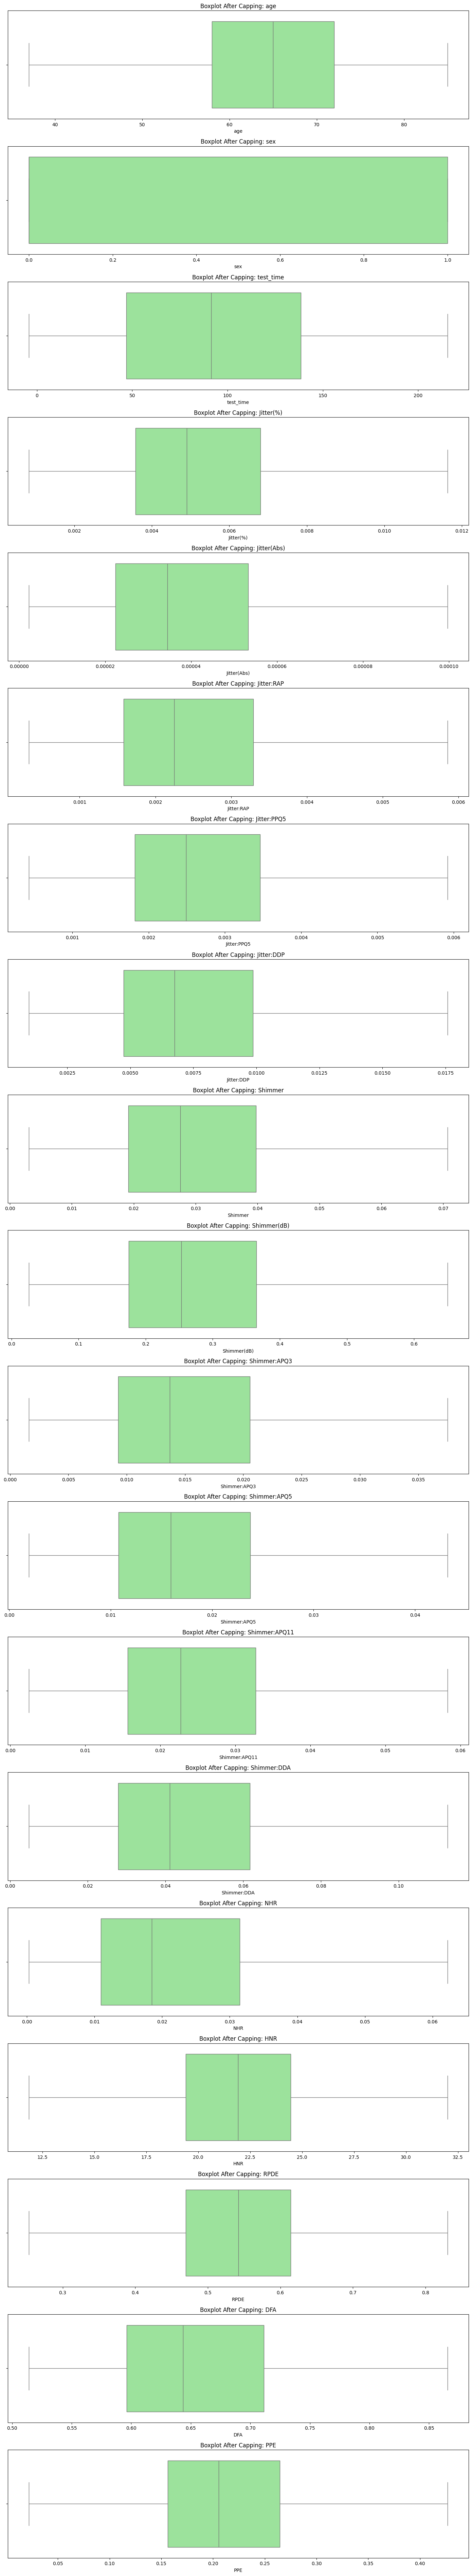

In [33]:
plt.figure(figsize=(14, len(cap_features) * 4))
for i, col in enumerate(cap_features, 1):
    plt.subplot(len(cap_features), 1, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot After Capping: {col}')
    plt.tight_layout()
plt.show()

In [34]:
df.describe()

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.822128,0.317787,92.863722,29.018942,0.005515,0.000041,0.002624,0.002825,0.007872,0.031501,0.289000,0.015982,0.018506,0.025749,0.047949,0.023379,21.784314,0.541345,0.653240,0.217338
std,8.766163,0.465656,53.445602,10.700283,0.002621,0.000025,0.001392,0.001361,0.004177,0.016273,0.149378,0.008927,0.010118,0.013305,0.026786,0.016699,3.908086,0.100264,0.070902,0.084654
min,37.000000,0.000000,-4.262500,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,11.849000,0.253395,0.514040,0.021983
25%,58.000000,0.000000,46.847500,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,65.000000,0.000000,91.523000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,72.000000,1.000000,138.445000,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,85.000000,1.000000,215.490000,54.992000,0.011630,0.000100,0.005855,0.005920,0.017580,0.070695,0.650000,0.037518,0.043202,0.058290,0.112592,0.062225,32.001000,0.830435,0.865600,0.426715


Converting total updrs to binary

In [35]:
# Convert total_UPDRS to binary label with threshold 30
df['label'] = (df['total_UPDRS'] > 30).astype(int)

# Check class distribution
print(df['label'].value_counts())
print(df['label'].value_counts(normalize=True) * 100)


label
0    3341
1    2534
Name: count, dtype: int64
label
0    56.868085
1    43.131915
Name: proportion, dtype: float64


In [36]:
df.head(1000)

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,updrs_group,label
0,72.0,0.0,5.6431,34.398,0.00662,0.000034,0.004010,0.00317,0.01204,0.02565,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060,Mild,1
1,72.0,0.0,12.6660,34.894,0.00300,0.000017,0.001320,0.00150,0.00395,0.02024,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100,Mild,1
2,72.0,0.0,19.6810,35.389,0.00481,0.000025,0.002050,0.00208,0.00616,0.01675,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140,Mild,1
3,72.0,0.0,25.6470,35.810,0.00528,0.000027,0.001910,0.00264,0.00573,0.02309,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770,Mild,1
4,72.0,0.0,33.6420,36.375,0.00335,0.000020,0.000930,0.00130,0.00278,0.01703,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610,Mild,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.0,0.0,56.3090,24.211,0.00670,0.000060,0.002670,0.00344,0.00800,0.03871,...,0.02386,0.02937,0.05855,0.058288,20.301,0.62138,0.56444,0.258520,Mild,0
996,72.0,0.0,63.2990,24.361,0.01163,0.000100,0.005855,0.00592,0.01758,0.03350,...,0.01913,0.02807,0.04779,0.055323,19.261,0.62820,0.58027,0.426715,Mild,0
997,72.0,0.0,70.2980,24.512,0.00789,0.000077,0.003330,0.00364,0.00999,0.03420,...,0.02197,0.02714,0.05065,0.048822,20.339,0.57962,0.57977,0.272590,Mild,0
998,72.0,0.0,77.2990,24.662,0.00364,0.000035,0.001650,0.00219,0.00494,0.01797,...,0.01185,0.01597,0.02722,0.009344,23.746,0.47321,0.57912,0.182230,Mild,0


Splitting the Data into train test

In [37]:
X=df.drop(columns=['total_UPDRS','label','updrs_group'],axis=1)
y=df['label']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,stratify=y,random_state=2)


In [39]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (4700, 19)
X_test shape (1175, 19)
y_train shape (4700,)
y_test shape (1175,)


Using standard Scaler

In [40]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [41]:
print(X_train)

[[-0.3257876  -0.68733622  1.5357881  ... -0.02753775  0.84355672
  -0.35935094]
 [-1.81383594 -0.68733622 -0.33575858 ...  0.9811048   1.62010578
  -0.17983628]
 [ 1.16226074 -0.68733622 -1.36660238 ...  1.05323598  1.60449322
   1.285984  ]
 ...
 [ 0.13207342 -0.68733622 -1.23678617 ...  0.65168919 -0.91588037
   0.62909944]
 [ 1.16226074 -0.68733622  0.9951528  ...  0.17393209  2.02293797
   1.84609802]
 [ 0.36100394  1.45489205  0.09834307 ...  1.48870929 -0.30867836
   2.46874161]]


Model Building and training



In [42]:
# Reshape for CNN input
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [43]:
input_layer = Input(shape=(X_train_cnn.shape[1], 1))

# CNN Block
x = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

# Flatten for Transformer input
x_flat = Flatten()(x)
x_seq = Reshape((1, x_flat.shape[1]))(x_flat)

# Transformer Block
attention_output = MultiHeadAttention(num_heads=2, key_dim=32)(x_seq, x_seq)
attention_output = Add()([x_seq, attention_output])
x_trans = LayerNormalization()(attention_output)
x_trans = Flatten()(x_trans)

# Dense Layers
x = Dense(64, activation='relu')(x_trans)
x = Dropout(0.3)(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [44]:
history = model.fit(
    X_train_cnn, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_cnn, y_test)
)


Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5707 - loss: 0.7361 - val_accuracy: 0.6655 - val_loss: 0.6098
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6386 - loss: 0.6284 - val_accuracy: 0.6970 - val_loss: 0.5876
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6575 - loss: 0.6047 - val_accuracy: 0.7149 - val_loss: 0.5447
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6905 - loss: 0.5630 - val_accuracy: 0.7183 - val_loss: 0.5438
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7102 - loss: 0.5392 - val_accuracy: 0.7081 - val_loss: 0.5360
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7000 - loss: 0.5506 - val_accuracy: 0.7472 - val_loss: 0.4864
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7229 - loss: 0.5146 - val_accuracy: 0.7677 - val_loss: 0.4828
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7417 - loss: 0.5158 - val_accu

Model Architecture

In [45]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 19, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 17, 64)    │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 8, 64)     │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 8, 64)     │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 512)       │          0 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 512)    │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 512)    │    131,776 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 512)    │          0 │ reshape[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 1, 512)    │      1,024 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 512)       │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     32,832 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 497,861 (1.90 MB)

 Trainable params: 165,953 (648.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 331,908 (1.27 MB)

Accuracy and F1 score

In [46]:
# Predict on test
y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)

# Accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f" Test Accuracy: {acc:.4f}")
print(f" Test F1 Score: {f1:.4f}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
 Test Accuracy: 0.8051
 Test F1 Score: 0.7804


Confusion Matrix

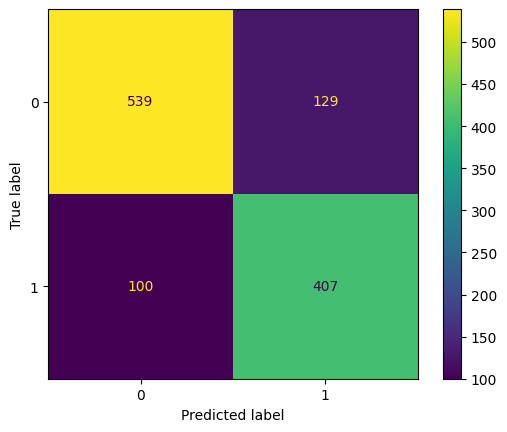

In [47]:
confusionmatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusionmatrix).plot()

Accuracy and Loss plot

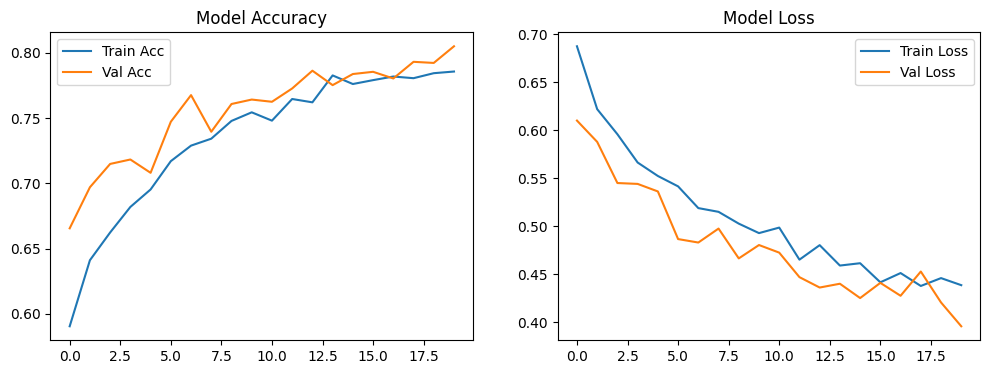

In [48]:

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


Plotting the ROC Curve

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


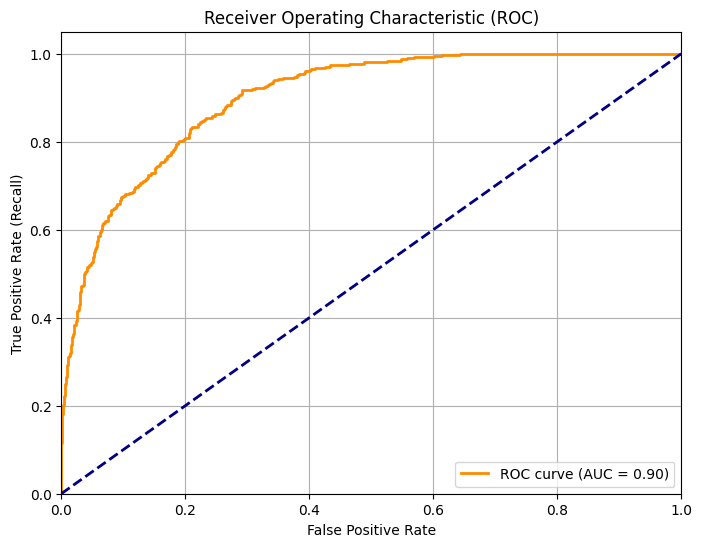

In [49]:


# Predict probabilities for the test set
y_probs = model.predict(X_test_cnn).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Comparing Accuracy And F1 Score using Logistic Regression

In [67]:
select= SelectKBest(score_func=f_classif,k=10)
select.fit(X_train,y_train)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y=lr.predict(X_test)
print("Accuracy of LR: ",accuracy_score(y_test,y))
print("F1 score of LR: ",f1_score(y_test,y))

Accuracy of LR:  0.6170212765957447
F1 score of LR:  0.5108695652173914


Saving Model for streamlit

In [ ]:
model.save('parkinsons.keras')
joblib.dump(scaler, 'scaler.pkl')
files.download('parkinsons.keras')
files.download('scaler.pkl')